This is a small xarray tutorial.

First import numpy, matplotlib.pyplot and xarray.

In [25]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

Next, we will create a random 4 dimensional matrix with arbitrary dimensions, for example 10x8x5x5 named scanimage.

In [2]:
scanimage=np.random.RandomState(np.random.randint(1,10)).rand(10,5,4,8)

Let's say that the first dimension is time, 2nd energy, 3rd is x direction and 4th is y direction. Dimension sizes indicates the binning values, for example I have 10 binning for time value. But time value can be from $10s$ to $18s$. This is called coordinates and needs to be hold in an array in the same size of your binning. 

Something like; 

In [3]:
start_time=10
stop_time=18
step_size=(stop_time-start_time)/(scanimage.shape[0])
time=np.arange(0,scanimage.shape[0])*scanimage.shape[0]/(scanimage.shape[0]-1)*step_size+start_time

Similar concept for other dimension:

In [8]:
start_energy=1
stop_energy=3
step_size=(stop_energy-start_energy)/scanimage.shape[1]
energy=np.arange(0,scanimage.shape[1])*scanimage.shape[1]/(scanimage.shape[1]-1)*step_size+start_energy

start_y=-15
stop_y=15
step_size=(stop_y-start_y)/scanimage.shape[2]
y=np.arange(0,scanimage.shape[2])*scanimage.shape[2]/(scanimage.shape[2]-1)*step_size+start_y

start_x=-15
stop_x=15
step_size=(stop_x-start_x)/scanimage.shape[3]
x=np.arange(0,scanimage.shape[3])*scanimage.shape[3]/(scanimage.shape[3]-1)*step_size+start_x

Now it is time for the magic, we can attach this coordinates, dimensions and matrix values all together with xarray as a something called DataArray:

In [9]:
data = xr.DataArray(scanimage, dims=['time','energy', 'y', 'x'], coords={'time': time,'energy': energy, 'y': y,'x': x})

It looks like this:

In [10]:
data

<xarray.DataArray (time: 10, energy: 5, y: 4, x: 8)>
array([[[[0.4359949 , 0.02592623, 0.54966248, ..., 0.33033482,
          0.20464863, 0.61927097],
         [0.29965467, 0.26682728, 0.62113383, ..., 0.51357812,
          0.18443987, 0.78533515],
         [0.85397529, 0.49423684, 0.84656149, ..., 0.0652865 ,
          0.42812233, 0.09653092],
         [0.12715997, 0.59674531, 0.226012  , ..., 0.34982629,
          0.46778748, 0.20174323]],

        [[0.64040673, 0.48306984, 0.50523672, ..., 0.58000418,
          0.1622986 , 0.70075235],
         [0.96455108, 0.50000836, 0.88952006, ..., 0.42754596,
          0.43674726, 0.77655918],
         [0.53560417, 0.95374223, 0.54420816, ..., 0.8508505 ,
          0.40627504, 0.02720237],
         [0.24717724, 0.06714437, 0.99385201, ..., 0.60181712,
          0.76495986, 0.16922545]],

        [[0.29302323, 0.52406688, 0.35662428, ..., 0.44135492,
          0.50400044, 0.32354132],
...
         [0.24452532, 0.15226059, 0.90992794, ..., 0.14148801,
          0.07633674, 0.37146731]],

        [[0.61011971, 0.53134911, 0.84139807, ..., 0.05962038,
          0.74523515, 0.69520793],
         [0.81191997, 0.10421727, 0.4619853 , ..., 0.8511911 ,
          0.82071801, 0.51297991],
         [0.34598712, 0.72904902, 0.88966095, ..., 0.14776746,
          0.33080199, 0.71784392],
         [0.35993361, 0.52241085, 0.65478695, ..., 0.14052038,
          0.41131472, 0.22634251]],

        [[0.81253091, 0.79003866, 0.21545556, ..., 0.42786073,
          0.08590395, 0.72578034],
         [0.08532788, 0.68123905, 0.08036249, ..., 0.40413161,
          0.98589983, 0.95028185],
         [0.57751558, 0.68874147, 0.80492581, ..., 0.457707  ,
          0.83356519, 0.74776346],
         [0.23770921, 0.86291151, 0.61282779, ..., 0.74206997,
          0.43468881, 0.97435075]]]])
Coordinates:
  * time     (time) float64 10.0 10.89 11.78 12.67 ... 15.33 16.22 17.11 18.0
  * energy   (energy) float64 1.0 1.5 2.0 2.5 3.0
  * y        (y) float64 -15.0 -5.0 5.0 15.0
  * x        (x) float64 -15.0 -10.71 -6.429 -2.143 2.143 6.429 10.71 15.0

One can do many things from this point which also I am not very familiar of. I will focus on plotting, slicing, selecting and summing on dimensions.

To select certain values inside a DataArray, one can use the option ".sel" together with "nearest" method. Wtihout adding nearest method most likely you will get an error as the exact value that you are searching is not inside the coordinate array. Let select $13s$ inside our DataArray

In [12]:
data.sel(time=13, method="nearest")

<xarray.DataArray (energy: 5, y: 4, x: 8)>
array([[[0.44646811, 0.76243056, 0.63656342, 0.18524397, 0.57920196,
         0.65424193, 0.59374037, 0.54147664],
        [0.59187907, 0.70899117, 0.77097797, 0.0890502 , 0.91349549,
         0.44962501, 0.69662112, 0.38763905],
        [0.05105715, 0.66364126, 0.36566056, 0.55277996, 0.26658984,
         0.20387608, 0.29620495, 0.84186763],
        [0.92401519, 0.97858359, 0.41433095, 0.77318657, 0.16805312,
         0.74425589, 0.42420632, 0.84409209]],

       [[0.19702026, 0.81891554, 0.07232532, 0.84610771, 0.42364894,
         0.14074136, 0.30591715, 0.70936193],
        [0.44628497, 0.23326436, 0.2387655 , 0.69317325, 0.64776948,
         0.0639251 , 0.8125177 , 0.14018418],
        [0.24056424, 0.01390383, 0.50625484, 0.85093205, 0.92973708,
         0.46330977, 0.10274928, 0.47430512],
        [0.29045827, 0.30939728, 0.24295909, 0.95369155, 0.39741033,
         0.00357343, 0.49526216, 0.70019775]],

       [[0.81527032, 0.75338683, 0.70216227, 0.19809563, 0.35010538,
         0.45947206, 0.13696235, 0.42737747],
...
        [0.33364658, 0.62488757, 0.4457022 , 0.67794344, 0.30085687,
         0.3223818 , 0.99827953, 0.23827391]],

       [[0.76286148, 0.69958668, 0.64784065, 0.1215616 , 0.00557232,
         0.74555326, 0.0830285 , 0.24271912],
        [0.98922763, 0.96611418, 0.92132475, 0.58326448, 0.45623204,
         0.4623376 , 0.33973915, 0.9673533 ],
        [0.81597955, 0.99192524, 0.30088171, 0.57985073, 0.68206786,
         0.38362915, 0.584178  , 0.19651722],
        [0.3138682 , 0.13494683, 0.64277871, 0.33414298, 0.42483624,
         0.38056628, 0.05274983, 0.89585385]],

       [[0.72747467, 0.3240332 , 0.89869932, 0.67562322, 0.99167113,
         0.46321296, 0.10960787, 0.12159851],
        [0.74647161, 0.5787477 , 0.21680949, 0.5475959 , 0.52980388,
         0.85777633, 0.05307624, 0.11305135],
        [0.4426011 , 0.13941709, 0.98874244, 0.19825257, 0.61963299,
         0.44365698, 0.78167436, 0.05262957],
        [0.32439506, 0.46977262, 0.11363392, 0.64117731, 0.53421466,
         0.82680861, 0.44228506, 0.2950208 ]]])
Coordinates:
    time     float64 12.67
  * energy   (energy) float64 1.0 1.5 2.0 2.5 3.0
  * y        (y) float64 -15.0 -5.0 5.0 15.0
  * x        (x) float64 -15.0 -10.71 -6.429 -2.143 2.143 6.429 10.71 15.0

This selected the energy, x and y values at the $12.67s$ time value which is the nearest one to $13s$.

One can also slice between certain values. Let's slice our DataArray from $11s$ to $14s$. For this there is no nearest method, it does it automatically.

In [14]:
data.sel(time=slice(11,14))

<xarray.DataArray (time: 3, energy: 5, y: 4, x: 8)>
array([[[[0.0434897 , 0.24755088, 0.94317072, 0.55686017, 0.35751823,
          0.00945037, 0.25354827, 0.25422669],
         [0.17068553, 0.34497996, 0.20264905, 0.06290154, 0.0979604 ,
          0.4967275 , 0.06966059, 0.93515356],
         [0.20609764, 0.46421235, 0.41466826, 0.29133772, 0.32352851,
          0.21159758, 0.28026829, 0.11710504],
         [0.68925187, 0.64452619, 0.3115294 , 0.88029896, 0.38637573,
          0.6110893 , 0.52316933, 0.3250568 ]],

        [[0.92979042, 0.84820141, 0.84112295, 0.95428864, 0.00248243,
          0.4921191 , 0.93791312, 0.13442676],
         [0.24499414, 0.50506192, 0.67842151, 0.33275996, 0.30636467,
          0.77579791, 0.03285394, 0.78579786],
         [0.42854028, 0.62900946, 0.70550302, 0.09846863, 0.90384616,
          0.82231247, 0.37538144, 0.19479433],
         [0.06280544, 0.30860893, 0.71319196, 0.81318172, 0.3265883 ,
          0.22028989, 0.32739418, 0.96436684]],

        [[0.0960907 , 0.16218345, 0.69423912, 0.1397635 , 0.26662589,
          0.80317587, 0.30061178, 0.59701655],
...
         [0.91376399, 0.06078183, 0.79447128, 0.12123879, 0.90263192,
          0.63443795, 0.31017495, 0.86514449]],

        [[0.18039058, 0.21556824, 0.32589085, 0.41383505, 0.21867176,
          0.91971039, 0.44041225, 0.95182595],
         [0.25325094, 0.46855267, 0.80160178, 0.98933518, 0.44974214,
          0.47000959, 0.94066896, 0.43220299],
         [0.44044479, 0.95314832, 0.496888  , 0.12623265, 0.94145649,
          0.50147579, 0.36070629, 0.90069796],
         [0.01714076, 0.94762497, 0.08750644, 0.07549971, 0.94225929,
          0.47796601, 0.17970571, 0.98226466]],

        [[0.33521609, 0.94133935, 0.4594912 , 0.36793331, 0.57333576,
          0.91052189, 0.98008618, 0.69572695],
         [0.36830576, 0.86359418, 0.92431944, 0.54292291, 0.7115508 ,
          0.8714989 , 0.68448133, 0.65043233],
         [0.38071717, 0.60040955, 0.24318227, 0.11988065, 0.25853244,
          0.44623723, 0.344564  , 0.70197734],
         [0.3825278 , 0.50486161, 0.29085578, 0.08902619, 0.7167954 ,
          0.22411043, 0.46544141, 0.59395606]]]])
Coordinates:
  * time     (time) float64 11.78 12.67 13.56
  * energy   (energy) float64 1.0 1.5 2.0 2.5 3.0
  * y        (y) float64 -15.0 -5.0 5.0 15.0
  * x        (x) float64 -15.0 -10.71 -6.429 -2.143 2.143 6.429 10.71 15.0

We can also sum up all the dimension. Let sum all the x values.

In [15]:
data.sum(dim='x')

<xarray.DataArray (time: 10, energy: 5, y: 4)>
array([[[3.02152823, 3.33469096, 3.36960493, 2.29652617],
        [4.25229851, 4.9036897 , 3.7663198 , 4.61501471],
        [3.47144348, 3.67442023, 3.47179072, 3.46804448],
        [4.8871095 , 4.59724394, 4.27541783, 2.70411887],
        [2.38293751, 4.00693546, 3.27726215, 2.36990942]],

       [[4.44270284, 3.26833892, 5.43376265, 3.49970082],
        [4.64955772, 3.76614666, 5.07953801, 5.08865322],
        [3.88945787, 4.42143398, 3.99158874, 3.93189794],
        [2.43011642, 4.53470432, 5.27140868, 5.44468597],
        [3.97615817, 2.44214966, 4.49230232, 5.03303618]],

       [[2.66581503, 2.38071813, 2.30881538, 4.37129758],
        [5.14034482, 3.66205191, 4.15785579, 3.73642725],
        [3.05970686, 2.70421013, 4.22891804, 3.55047993],
        [5.46152098, 4.5708466 , 4.44662519, 4.1333646 ],
        [4.16624496, 4.74348601, 3.52703378, 5.59382969]],

       [[4.39936696, 4.60827907, 3.24167744, 5.27072372],
        [3.51403821, 3.27588453, 3.5817562 , 3.39294986],
...
        [3.83954497, 3.98466499, 4.09385483, 3.87538554],
        [3.66045124, 4.45561474, 3.93273159, 3.71254046]],

       [[5.01223224, 2.87426207, 4.5553595 , 4.82925933],
        [3.90502984, 2.86515253, 3.14013403, 2.90175524],
        [3.65275517, 3.90470834, 3.98319106, 4.51851221],
        [3.33711455, 3.00847733, 5.77000464, 5.515748  ],
        [4.23262197, 4.99419613, 3.1897828 , 5.04886352]],

       [[4.44943831, 2.31795273, 3.89296202, 4.89911369],
        [4.50839962, 3.04696695, 3.76830247, 5.15722289],
        [4.3602511 , 2.95197434, 4.97365558, 2.36212688],
        [3.91981405, 4.42200263, 3.53233208, 4.06192353],
        [3.12797105, 3.14465989, 3.48998825, 4.40421317]],

       [[4.19129147, 3.6741896 , 4.42242939, 3.73006374],
        [4.86002864, 3.07279803, 5.27913748, 2.59996109],
        [2.42296004, 3.53564146, 3.69711068, 2.84026398],
        [4.53097731, 4.22555602, 4.54079872, 3.33273535],
        [4.30061733, 4.05551662, 4.95947832, 4.20771946]]])
Coordinates:
  * time     (time) float64 10.0 10.89 11.78 12.67 ... 15.33 16.22 17.11 18.0
  * energy   (energy) float64 1.0 1.5 2.0 2.5 3.0
  * y        (y) float64 -15.0 -5.0 5.0 15.0

And we can combine all this methods to work together. Lets select energy=$2$, slice y dimension from $-10$ to $5$ and sum it.

In [18]:
data.sel(energy=2, method="nearest").sel(y=slice(-10,5)).sum(dim='y')

<xarray.DataArray (time: 10, x: 8)>
array([[0.84242964, 0.41244083, 1.49421892, 1.12427048, 0.87628437,
        0.42792317, 1.14827684, 0.8203667 ],
       [0.71153961, 0.40692008, 1.40800338, 0.88668784, 1.19626148,
        1.33485166, 1.36738542, 1.10137325],
       [0.79311394, 0.82830087, 0.78819538, 0.78503749, 1.17669314,
        0.53020687, 0.87786493, 1.15371554],
       [0.2826096 , 0.96267696, 1.13977153, 0.44660063, 0.62299631,
        1.06959422, 1.17044361, 0.66518482],
       [0.95643915, 0.81814688, 1.22146352, 0.86059564, 1.69834962,
        1.8271753 , 0.66323381, 0.88591508],
       [0.80393642, 0.30985221, 0.50631686, 1.14164946, 0.37241886,
        0.13456882, 0.99224566, 0.99812611],
       [0.16951609, 0.48116998, 1.48070099, 1.65697729, 0.97528878,
        1.03482226, 1.5939491 , 0.24525629],
       [1.38439937, 1.17364298, 1.14386908, 0.13911384, 0.76872686,
        1.14957966, 1.045893  , 1.08267462],
       [0.86060365, 0.73567422, 0.83873903, 0.78021406, 1.30471826,
        1.22094575, 1.4995844 , 0.68515055],
       [0.79476231, 1.77563557, 1.75256758, 0.56532488, 0.24043361,
        1.35796087, 0.64739153, 0.09867578]])
Coordinates:
  * time     (time) float64 10.0 10.89 11.78 12.67 ... 15.33 16.22 17.11 18.0
    energy   float64 2.0
  * x        (x) float64 -15.0 -10.71 -6.429 -2.143 2.143 6.429 10.71 15.0

Also one can directly plot 2D or 1D DataArray, xarray has a built-in plotting function. Lets plot this last one.

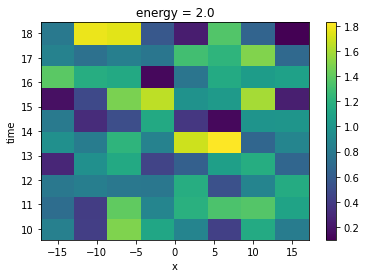

In [19]:
data.sel(energy=2, method="nearest").sel(y=slice(-10,5)).sum(dim='y').plot()

Or one can do values vs dimension plots. To do this lets slice and add up time values between $13s$ and $15s$, sum and plot it.

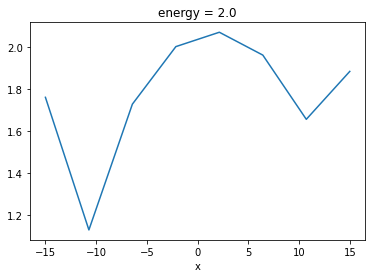

In [20]:
data.sel(energy=2, method="nearest").sel(y=slice(-10,5)).sum(dim='y').sel(time=slice(13,15)).sum(dim='time').plot()

You can also assign your modified DataArray to new data array.

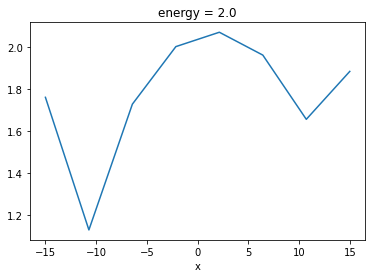

In [28]:
dataselected=data.sel(energy=2, method="nearest").sel(y=slice(-10,5)).sum(dim='y').sel(time=slice(13,15)).sum(dim='time')
dataselected.plot()

and use already existing matplotlib functions in

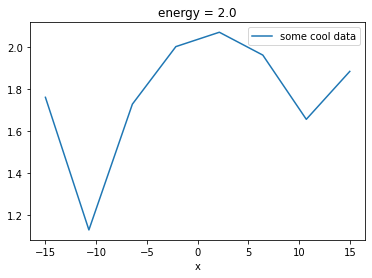

In [29]:
dataselected.plot(label='some cool data')
plt.legend()

or you can export them as numpy arrays, for plotting or fitting.

In [36]:
dataselected_as_array_ydim=dataselected.values
xdim=dataselected.coords['x']

and then plot

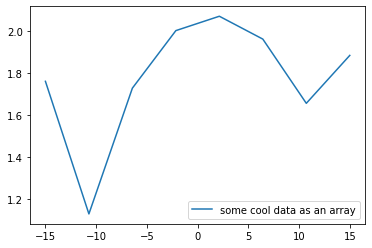

In [40]:
plt.plot(xdim,dataselected_as_array_ydim,label='some cool data as an array')
plt.legend()

you can ignore the down part, I will continue later on. But just for a start, there is a second type of data type in xarray called Dataset. Datasets contains multiple DataArrays inside that shares dimensions and coordinates. In down example(which I will make more understandable later) I create random number of experiments and in every experiment a DataArray is created. This DataArrays are added to single Dataset and also an extra DataArray is added called datasum where all the different experiments are added each other(for example for better statistics.)

In [41]:
import xarray as xr
import numpy as np

#Number of experiments. This value can change from 1 to 10
n=np.random.randint(1,10)

#empty list to append the DataArrays created by conversion matrices.
a=[]

#Empty Dataset to append the experiments in 'a' list.
data = xr.Dataset()

#dimension offset and factor for the calculation of the coordinates
offsets=[-10,-1,-15,-15]
factors=[0.8,0.01,0.3,0.3]

for i in range(n):
    #Generating random 4D matrix
    scanimage=np.random.RandomState(np.random.randint(1,10)).rand(10,8,5,5)
    
    #Creating 
    time=(np.arange(0,scanimage.shape[0])*scanimage.shape[0]/(scanimage.shape[0]-1)*factors[0]-offsets[0])
    z=(np.arange(0,scanimage.shape[1])*scanimage.shape[1]/(scanimage.shape[1]-1)*factors[1]-offsets[1])
    x=(np.arange(0,scanimage.shape[2])*scanimage.shape[2]/(scanimage.shape[2]-1)*factors[2]-offsets[2])
    y=(np.arange(0,scanimage.shape[3])*scanimage.shape[3]/(scanimage.shape[3]-1)*factors[3]-offsets[3])
    a.append(xr.DataArray(scanimage, dims=['time', 'z', 'y', 'x'], 
                                  coords={'time':time, 'z': z, 'y': y,'x': x}, 
                                  name="matrix%d" % i))
    data["matrix%d" % i] = a[i]
    data.attrs['Type'] = "Experiment Number is: %d" % n

#This is the part, I was asking for
datasum=data["matrix0"]
for i in range(n-1):
    datasum=datasum+data["matrix%d" % (i+1)]

In [42]:
data

<xarray.Dataset>
Dimensions:  (time: 10, x: 5, y: 5, z: 8)
Coordinates:
  * time     (time) float64 10.0 10.89 11.78 12.67 ... 15.33 16.22 17.11 18.0
  * z        (z) float64 1.0 1.011 1.023 1.034 1.046 1.057 1.069 1.08
  * y        (y) float64 15.0 15.38 15.75 16.12 16.5
  * x        (x) float64 15.0 15.38 15.75 16.12 16.5
Data variables:
    matrix0  (time, z, y, x) float64 0.07631 0.7799 0.4384 ... 0.03935 0.6486
    matrix1  (time, z, y, x) float64 0.222 0.8707 0.2067 ... 0.5262 0.4034
    matrix2  (time, z, y, x) float64 0.01037 0.5019 0.4958 ... 0.2629 0.5865
    matrix3  (time, z, y, x) float64 0.5508 0.7081 0.2909 ... 0.4273 0.7997
    matrix4  (time, z, y, x) float64 0.01037 0.5019 0.4958 ... 0.2629 0.5865
    matrix5  (time, z, y, x) float64 0.07631 0.7799 0.4384 ... 0.03935 0.6486
Attributes:
    Type:     Experiment Number is: 6

In [43]:
data.attrs['Type'] = "it is a 4 dimensional array created randomly"

In [44]:
data

<xarray.Dataset>
Dimensions:  (time: 10, x: 5, y: 5, z: 8)
Coordinates:
  * time     (time) float64 10.0 10.89 11.78 12.67 ... 15.33 16.22 17.11 18.0
  * z        (z) float64 1.0 1.011 1.023 1.034 1.046 1.057 1.069 1.08
  * y        (y) float64 15.0 15.38 15.75 16.12 16.5
  * x        (x) float64 15.0 15.38 15.75 16.12 16.5
Data variables:
    matrix0  (time, z, y, x) float64 0.07631 0.7799 0.4384 ... 0.03935 0.6486
    matrix1  (time, z, y, x) float64 0.222 0.8707 0.2067 ... 0.5262 0.4034
    matrix2  (time, z, y, x) float64 0.01037 0.5019 0.4958 ... 0.2629 0.5865
    matrix3  (time, z, y, x) float64 0.5508 0.7081 0.2909 ... 0.4273 0.7997
    matrix4  (time, z, y, x) float64 0.01037 0.5019 0.4958 ... 0.2629 0.5865
    matrix5  (time, z, y, x) float64 0.07631 0.7799 0.4384 ... 0.03935 0.6486
Attributes:
    Type:     it is a 4 dimensional array created randomly